Find the google slides presentation here: https://docs.google.com/presentation/d/1O_tjXTEnZbSD9oi9MMk2_8-X0NIZBrcJc6Vb1NCKzqA/edit?usp=sharing
Tableau components here: https://public.tableau.com/app/profile/joshua.mayes/viz/KalpanaTablueExercises/Sheet62?publish=yes


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# df = pd.read_clipboard()
# df.head()

In [40]:
df = pd.read_csv('churn.csv', index_col=0)

In [41]:
df.columns= df.columns.str.lower()
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,mo_charges_calc,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependants,partner_dependents,phone_servicetype,internet_servicetype,contract type,rounded_tenure,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,$65.60,True,False,True,True,True,2,3,One Line,DSL,1 Year,9.0,internet+phone
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,$59.90,False,False,True,True,True,0,0,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,$73.90,False,True,True,True,True,0,0,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,$98.00,False,True,True,True,True,1,1,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,$83.90,True,True,True,True,True,1,1,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


The strongest correlators seem to be contract_type and internet_service.  The number reduces a bit if we just lump all internet services into the same bin which leads me to believe that there's an important difference between internet types.  Let's take a look.

In [6]:
# 0	No Internet Service
# 1	DSL
# 2	Fiber Optic
df['internet_servicetype'].value_counts()

Fiber Optic            3098
DSL                    2422
No Internet Service    1529
Name: internet_servicetype, dtype: int64

In [7]:
churn_by_inet_type = pd.crosstab(df.internet_servicetype, df.churn, normalize='index')
global_churn_rate = df.has_churned.mean()
print('Global churn rate:', df.has_churned.mean() )
churn_by_inet_type

Global churn rate: 0.2652858561498085


churn,No,Yes
internet_servicetype,,
DSL,0.810074,0.189926
Fiber Optic,0.581343,0.418657
No Internet Service,0.926095,0.073905


Contract type was also a strong corellator, let's examine that a bit more closely as well.

In [8]:
df = df.rename(columns={'contract type': 'ct_type_str'})
# 0	Month-to-Month
# 1	1 Year
# 2	2 Year
df.columns

Index(['unnamed: 0', 'customer_id', 'gender', 'is_senior_citizen', 'partner',
       'dependents', 'phone_service', 'internet_service', 'contract_type',
       'payment_type', 'monthly_charges', 'total_charges', 'churn', 'tenure',
       'mo_charges_calc', 'is_female', 'has_churned', 'has_phone',
       'has_internet', 'has_phone_and_internet', 'partner_dependants',
       'partner_dependents', 'phone_servicetype', 'internet_servicetype',
       'ct_type_str', 'rounded_tenure', 'service_type'],
      dtype='object')

In [9]:
churn_by_ct_type = pd.crosstab(df.ct_type_str, df.churn, normalize='index')
churn_by_ct_type

churn,No,Yes
ct_type_str,,
1 Year,0.887534,0.112466
2 Year,0.971715,0.028285
Month-to-Month,0.572755,0.427245


It looks like this correllates just as strongly.  Do the two columns interact with each other meaningfully?

In [10]:
pd.crosstab(df.ct_type_str, df.internet_servicetype)

internet_servicetype,DSL,Fiber Optic,No Internet Service
ct_type_str,,,
1 Year,570,541,365
2 Year,628,429,640
Month-to-Month,1224,2128,524


In [11]:
pd.pivot_table(data = df, values='has_churned', index='ct_type_str', columns='internet_servicetype', aggfunc='sum')

internet_servicetype,DSL,Fiber Optic,No Internet Service
ct_type_str,,,
1 Year,53,104,9
2 Year,12,31,5
Month-to-Month,395,1162,99


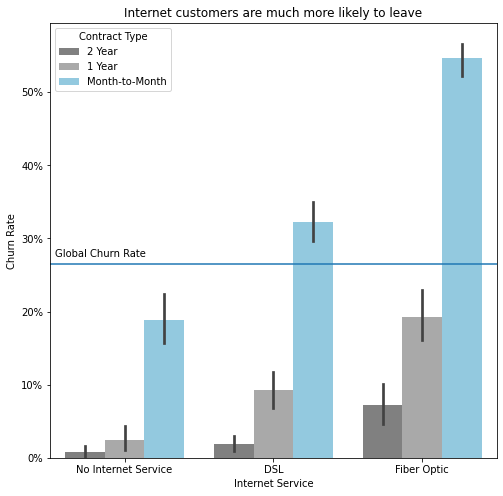

In [19]:
import matplotlib.ticker as ticker
plt.figure(figsize = (8,8))
churn = sns.barplot(
                    data = df, 
                    y='has_churned', 
                    x='internet_servicetype', 
                    hue='ct_type_str', 
                    # kind='bar', 
                    order=['No Internet Service','DSL','Fiber Optic'],
                    hue_order=['2 Year','1 Year','Month-to-Month'],
                    palette=['grey','darkgrey','skyblue'],
                    
                    ).set(
                        title='Internet customers are much more likely to leave'
                    )

plt.axhline(global_churn_rate)
plt.text(-0.47, .275 , 'Global Churn Rate')
plt.legend(title='Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
# print(plt.gca())
# print(plt.yticks()[1:])



We can clearly see that M2M customers using Fiber are much more at risk of churn than customers that are not using Fiber.  From this observation I can make two hypothesis:  

 - Customers who pay month to month feel more empowered to cancel their service.
 - The company's Fiber service is not providing enough value, or a competitor is offering more valuable internet service.

In [13]:
pd.pivot_table(data = df, values='monthly_charges', index='ct_type_str', columns='internet_servicetype', aggfunc='mean')

internet_servicetype,DSL,Fiber Optic,No Internet Service
ct_type_str,,,
1 Year,61.396754,98.774584,20.816164
2 Year,70.462978,104.571445,21.771953
Month-to-Month,50.203391,87.021194,20.409542


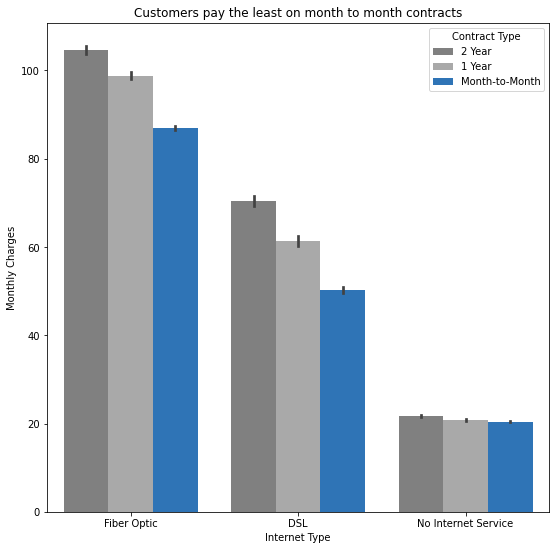

In [20]:
sblue = '#1874CD'
plt.figure(figsize = (9,9))
charges = sns.barplot(
                    data = df, 
                    y='monthly_charges', 
                    x='internet_servicetype', 
                    hue='ct_type_str', 
                    # kind='bar', 
                    # order=['No Internet Service','DSL','Fiber Optic'],
                    order=['Fiber Optic', 'DSL', 'No Internet Service'],
                    hue_order=['2 Year','1 Year','Month-to-Month'],
                    palette=['grey','darkgrey',sblue],
                    
                    ).set(
                        title='Customers pay the least on month to month contracts',
                        xlabel='Internet Type',
                        ylabel='Monthly Charges',
                        
                    )
plt.legend(title="Contract Type")

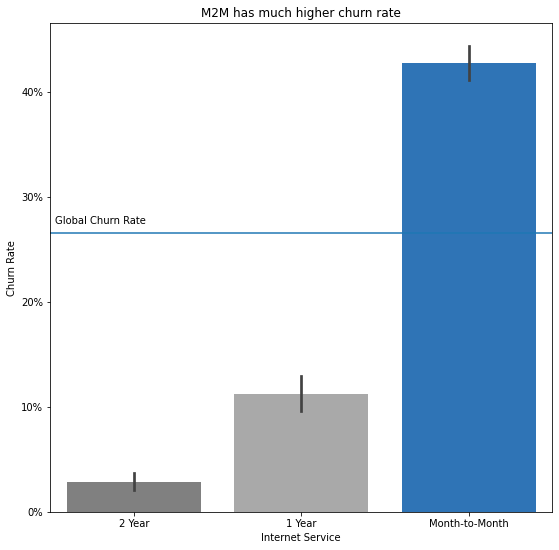

In [22]:
import matplotlib.ticker as ticker
plt.figure(figsize = (9,9))
churn = sns.barplot(
                    data = df, 
                    y='has_churned', 
                    x='ct_type_str', 
                    order=['2 Year','1 Year','Month-to-Month'],
                    palette=['grey','darkgrey',sblue],
                    ).set(
                        title='M2M has much higher churn rate',
                        
                    )

plt.axhline(global_churn_rate)
plt.text(-0.47, .275 , 'Global Churn Rate')
# plt.legend(title='Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)

In [ ]:
pd.pivot_table(data = df, values='rounded_tenure', index='ct_type_str', columns='internet_servicetype', aggfunc='mean')

internet_servicetype,DSL,Fiber Optic,No Internet Service
ct_type_str,,,
1 Year,40.498246,52.144177,29.424658
2 Year,59.103503,65.179487,48.850000
Month-to-Month,15.709150,21.532425,9.129771


In [ ]:
pd.pivot_table(data = df, values='rounded_tenure', index='ct_type_str', columns='internet_servicetype', aggfunc='mean')

internet_servicetype,DSL,Fiber Optic,No Internet Service
ct_type_str,,,
1 Year,40.498246,52.144177,29.424658
2 Year,59.103503,65.179487,48.850000
Month-to-Month,15.709150,21.532425,9.129771


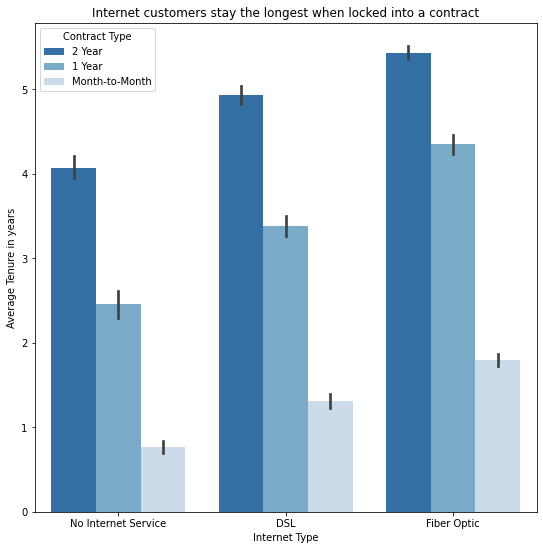

In [24]:
plt.figure(figsize = (9,9))
charges = sns.barplot(
                    data = df, 
                    y= df.rounded_tenure / 12,
                    x='internet_servicetype', 
                    hue='ct_type_str', 
                    # kind='bar', 
                    order=['No Internet Service','DSL','Fiber Optic'],
                    hue_order=['2 Year','1 Year','Month-to-Month'],
                    palette='Blues_r',
                    
                    ).set(
                        title='Internet customers stay the longest when locked into a contract',
                        xlabel='Internet Type',
                        ylabel='Average Tenure in years',
                        
                    )
plt.legend(title="Contract Type")

In [26]:
pivot_tenure_intet_charges = pd.pivot_table(data = df, values='monthly_charges', index='rounded_tenure', columns='internet_servicetype', aggfunc='mean')
pivot_tenure_intet_charges

internet_servicetype,DSL,Fiber Optic,No Internet Service
rounded_tenure,,,
0.0,64.940000,NaN,21.816667
1.0,44.157907,77.587660,20.124107
2.0,48.069753,80.333028,20.230952
3.0,46.808571,82.872778,20.096591
4.0,47.301639,82.496835,20.572581
...,...,...,...
74.0,80.565000,109.332353,23.946429
75.0,72.380000,104.350000,22.956250
76.0,NaN,NaN,25.300000


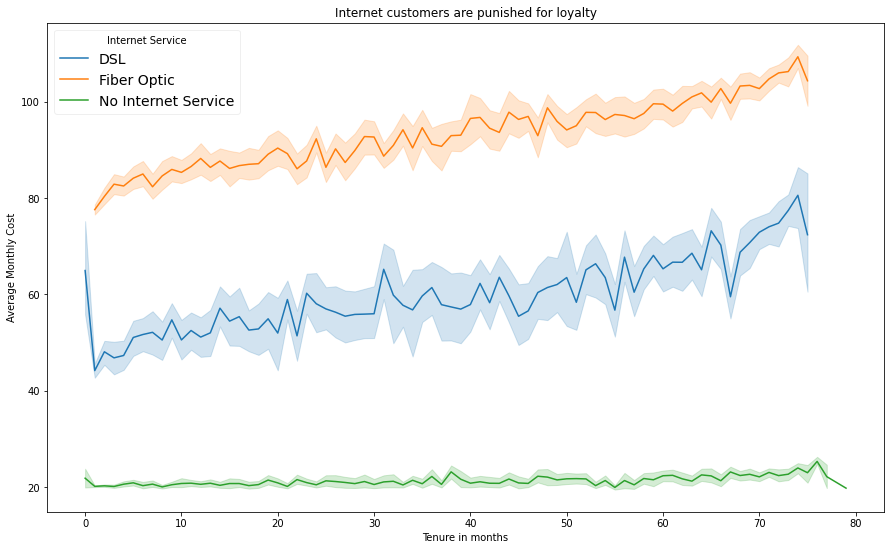

In [37]:
plt.figure(figsize = (15,9))
ax = sns.lineplot(   data = df,
                x = 'rounded_tenure',
                y = 'monthly_charges',
                hue = 'internet_servicetype',
                ).set(
                    ylabel= 'Average Monthly Cost',
                    xlabel= 'Tenure in months',
                    title= 'Internet customers are punished for loyalty',
                    )

# ax.invert_xaxis()
plt.legend(title='Internet Service', framealpha=0.3, fontsize=14)

Conclusions:

Customers are leaving because they are learning that the longer they stay with the company the more they will pay.
They will choose the month-to-month option because it is the cheapest option.  That empowers them to leave more frequently.
The churn rate for contract-locked customers is lower because they feel the only time to make the decision is near renewal and that only happens once every 1 or 2 years.

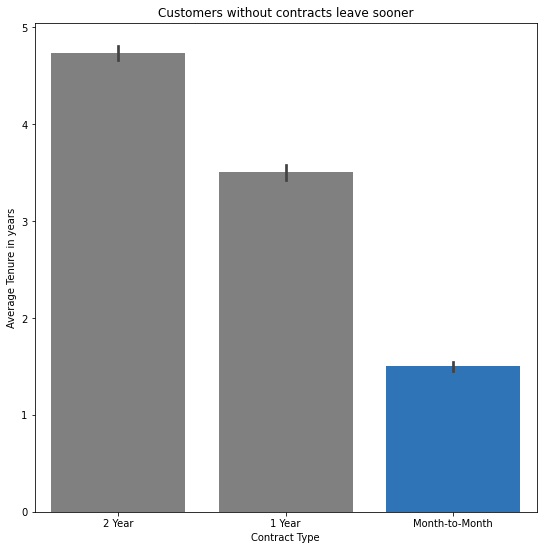

In [31]:
plt.figure(figsize = (9,9))
charges = sns.barplot(
                    data = df, 
                    y= df.rounded_tenure / 12,
                    # x='internet_servicetype', 
                    x='ct_type_str', 
                    # kind='bar', 
                    order=['2 Year','1 Year','Month-to-Month'],
                    # hue_order=['2 Year','1 Year','Month-to-Month'],
                    palette=['grey','grey','#1874CD'],
                    
                    ).set(
                        title='Customers without contracts leave sooner',
                        xlabel='Contract Type',
                        ylabel='Average Tenure in years',
                        
                    )

In [ ]:
df[(df.rounded_tenure == 1)].internet_servicetype.value_counts()

Fiber Optic            235
DSL                    215
No Internet Service    168
Name: internet_servicetype, dtype: int64

In [ ]:
df[df.internet_service == 2].monthly_charges.mean()


91.50397030342158

In [ ]:
df[df.internet_service == 2].has_churned.mean()

0.4186571981923822

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

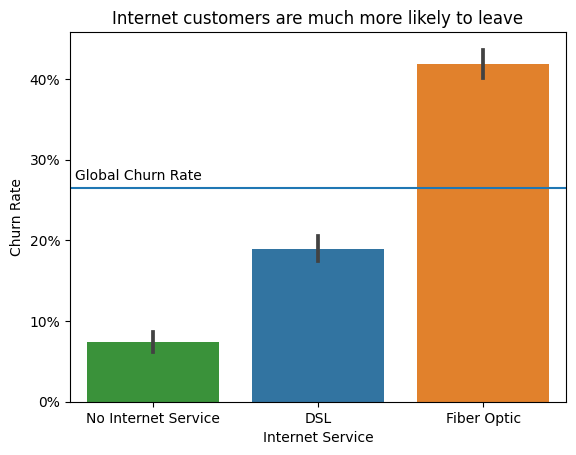

In [ ]:
import matplotlib.ticker as ticker
churn = sns.barplot(
                    data = df, 
                    y='has_churned', 
                    x='internet_servicetype', 
                    # hue='ct_type_str', 
                    # kind='bar', 
                    order=['No Internet Service','DSL','Fiber Optic'],
                    # hue_order=['2 Year','1 Year','Month-to-Month'],
                    palette=[colors[2], colors[0], colors[1]],
                    
                    ).set(
                        title='Internet customers are much more likely to leave'
                    )

plt.axhline(global_churn_rate)
plt.text(-0.47, .275 , 'Global Churn Rate')
# plt.legend(title='Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
# print(plt.gca())
# print(plt.yticks()[1:])



In [ ]:
#Flawed logic
newly_churned = df[(df.has_churned) & (df.rounded_tenure <= 1)]
newly_churned.monthly_charges.sum()

22255.6

In [32]:
df.head()

,unnamed: 0,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,mo_charges_calc,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependants,partner_dependents,phone_servicetype,internet_servicetype,ct_type_str,rounded_tenure,service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,$65.60,True,False,True,True,True,2,3,One Line,DSL,1 Year,9.0,internet+phone
1,1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,$59.90,False,False,True,True,True,0,0,Two or More Lines,DSL,Month-to-Month,9.0,internet+phone
2,2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,$73.90,False,True,True,True,True,0,0,One Line,Fiber Optic,Month-to-Month,4.0,internet+phone
3,3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,$98.00,False,True,True,True,True,1,1,One Line,Fiber Optic,Month-to-Month,13.0,internet+phone
4,4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,$83.90,True,True,True,True,True,1,1,One Line,Fiber Optic,Month-to-Month,3.0,internet+phone


In [35]:
df[df.contract_type == 0].monthly_charges.sum() * global_churn_rate

68264.59008369982

In [38]:
len(df)

7049

In [39]:
df.to_clipboard()